In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Lab10 2A.csv")
data = pd.DataFrame(data).to_numpy()
raw_time = data[:,0]
raw_volts = data[:,1]


In [9]:
volts_interp = interp1d(raw_time, raw_volts, kind="linear")

start_time = 0 + 8e-7
stop_time = .00357
step_size = 8e-7
time = np.arange(start_time, stop_time, step_size)

volts = volts_interp(time)


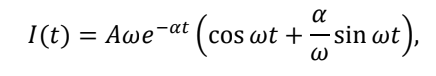

In [40]:
def strong_underdamped_fit(t, A, omega, alpha, phi):
    return A * np.exp(-alpha * t) * np.cos(omega * t + phi)



In [48]:
start_pars = [0, 372, 0.689, 0]

pars, cov = opt.curve_fit(strong_underdamped_fit, time, volts, p0=start_pars)

[A, omega, alpha, phi] = pars
[A_err, omega_err, alpha_err, phi_err] = np.sqrt(np.diag(cov))

volts_pred = strong_underdamped_fit(np.linspace(0,.00357), A, omega, alpha, phi)
pars


array([ 2.10431605e-01,  9.63869112e+03,  9.24490761e+02, -1.57547482e+00])

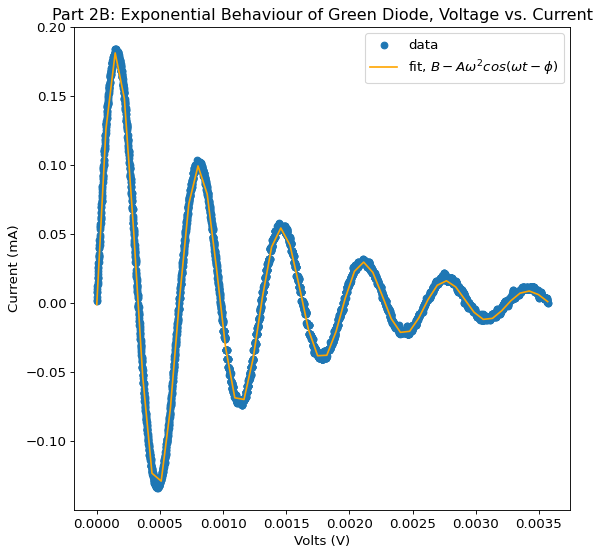

In [51]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.scatter(time, volts, label="data")
plt.plot(np.linspace(0,.00357), volts_pred, color='orange', label=r'fit, $B - A \omega ^ 2 cos(\omega t - \phi)$')

plt.title("Part 2B: Exponential Behaviour of Green Diode, Voltage vs. Current")
plt.xlabel("Volts (V)")
plt.ylabel("Current (mA)")

plt.legend(loc=1)
plt.show()


In [59]:
alpha

924.4907610192218

In [60]:
alpha_err


0.9710681198004664